# Analysing airbnb data and finding significant correlations


#### Step one: Loading the data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Base URL for the Google Sheets file
base_url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=csv&gid="

# List of `gid`s, sheet names, and their corresponding countries
sheets_info = [
    {"gid": "1813557111", "sheet_name": "amsterdam_weekdays", "country": "Netherlands"},
    {"gid": "1671143450", "sheet_name": "amsterdam_weekends", "country": "Netherlands"},
    {"gid": "1474041232", "sheet_name": "athens_weekdays", "country": "Greece"},
    {"gid": "993539767", "sheet_name": "athens_weekends", "country": "Greece"},
    {"gid": "295085637", "sheet_name": "berlin_weekends", "country": "Germany"},
    {"gid": "305266500", "sheet_name": "berlin_weekdays", "country": "Germany"},
    {"gid": "1009970054", "sheet_name": "barcelona_weekdays", "country": "Spain"},
    {"gid": "1739828988", "sheet_name": "barcelona_weekends", "country": "Spain"},
    {"gid": "1438277999", "sheet_name": "budapest_weekdays", "country": "Hungary"},
    {"gid": "1326018133", "sheet_name": "budapest_weekends", "country": "Hungary"},
    {"gid": "82202766", "sheet_name": "lisbon_weekdays", "country": "Portugal"},
    {"gid": "1355881051", "sheet_name": "lisbon_weekends", "country": "Portugal"},
    {"gid": "9179440", "sheet_name": "london_weekdays", "country": "England"},
    {"gid": "58206735", "sheet_name": "london_weekends", "country": "England"},
    {"gid": "1452107999", "sheet_name": "paris_weekdays", "country": "France"},
    {"gid": "1803477090", "sheet_name": "paris_weekends", "country": "France"},
    {"gid": "1127044053", "sheet_name": "rome_weekdays", "country": "Italy"},
    {"gid": "1238155247", "sheet_name": "rome_weekends", "country": "Italy"},
    {"gid": "671930913", "sheet_name": "vienna_weekdays", "country": "Austria"},
    {"gid": "1950822222", "sheet_name": "vienna_weekends", "country": "Austria"}
]

# List to store all DataFrames
df_list = []

# Retrieve data from each sheet
for sheet in sheets_info:
    # Construct the specific URL for the current sheet
    csv_url = f"{base_url}{sheet['gid']}"
    
    # Load data into a DataFrame
    sheet_df = pd.read_csv(csv_url)
    
    # Delete the first column by index
    sheet_df.drop(sheet_df.columns[0], axis=1, inplace=True)
    
    # Rename 'realSum' to 'price'
    sheet_df.rename(columns={'realSum': 'price'}, inplace=True)
    
    # Extract city and day type from the sheet name
    city, day_type = sheet['sheet_name'].split('_')
    
    # Add the `city`, `day_type`, and `country` columns
    sheet_df['city'] = city.capitalize()  # Capitalize to keep city names consistent
    sheet_df['day_type'] = 'Weekday' if day_type == 'weekdays' else 'Weekend'
    sheet_df['country'] = sheet['country']  # Assign country from sheets_info
    
    # Append the DataFrame to the list
    df_list.append(sheet_df)

# Concatenate all DataFrames into a single, large DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
combined_df


,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Weekend,Austria
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Weekend,Austria
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,...,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,Vienna,Weekend,Austria
51705,301.054157,Private room,False,True,2,False,0,0,10,87,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Weekend,Austria


##### Explanation

1. **Base URL Setup**:
   Define the base URL for dynamically accessing each sheet's data.

2. **Sheet Metadata**:
   Store `gid`, sheet name, and country for each sheet in a list.

3. **Data Extraction**:
   Loop through the metadata to fetch and process data:
   - Construct the download URL.
   - Load the data into a DataFrame.
   - Drop irrelevant columns, rename `realSum` to `price`, and add `city`, `day_type`, and `country` columns.

4. **Combining Data**:
   Append all individual DataFrames into a list, then combine them into a single dataset.

5. **Output**:
   The final dataset is ready for further analysis.

##### **Step 2: Handling Missing Values and Identifying Numeric Columns**

1. Identify missing values in each column.
2. List all numeric columns to prepare for correlation analysis.

In [6]:
# Check for missing values in each column
missing_values = combined_df.isnull().sum()
print(missing_values)

# Identify all numeric columns
numeric_columns = combined_df.select_dtypes(include=['number']).columns

# Print the list of numeric columns
print("\nNumeric columns:")
print(numeric_columns)


price                         0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
day_type                      0
country                       0
dtype: int64

Numeric columns:
Index(['price', 'person_capacity', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat'],
      dtype='object')


#### **Step 3: Filtering Out Discrete Variables**

Identify and remove discrete variables from the dataset to focus only on continuous variables for correlation analysis and scatter plots.

In [12]:
# Threshold for identifying discrete variables (e.g., less than 10 unique values)
threshold = 10

# Identify discrete columns
discrete_columns = [
    col for col in numeric_columns 
    if combined_df[col].nunique() <= threshold
]

# Identify continuous columns by excluding discrete ones
continuous_columns = [
    col for col in numeric_columns 
    if col not in discrete_columns
]

# Print results
print("Discrete columns:")
print(discrete_columns)

print("\nContinuous columns:")
print(continuous_columns)

Discrete columns:
['person_capacity', 'multi', 'biz', 'cleanliness_rating', 'bedrooms']

Continuous columns:
['price', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']


Drop all discrete variables

In [13]:
# Drop discrete columns from the DataFrame
filtered_df = combined_df.drop(columns=discrete_columns)

# Print the shape of the filtered dataset
print(f"Filtered DataFrame Shape: {filtered_df.shape}")

# Display the first few rows of the filtered dataset
filtered_df.head()

Filtered DataFrame Shape: (51707, 17)


,price,room_type,room_shared,room_private,host_is_superhost,guest_satisfaction_overall,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country
0,194.033698,Private room,False,True,False,93,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands
1,344.245776,Private room,False,True,False,85,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands
2,264.101422,Private room,False,True,False,87,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands
3,433.529398,Private room,False,True,False,90,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands
4,485.552926,Private room,False,True,True,98,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands


##### Explanation: 

- there are no missing values 
- we found all columns that can be used for correlation analysis


##### **Step 4: Checking for Normal Distribution**

Before analyzing correlations, verify whether the numeric variables are normally distributed. This is important because many statistical methods, including correlation analysis, assume normality.

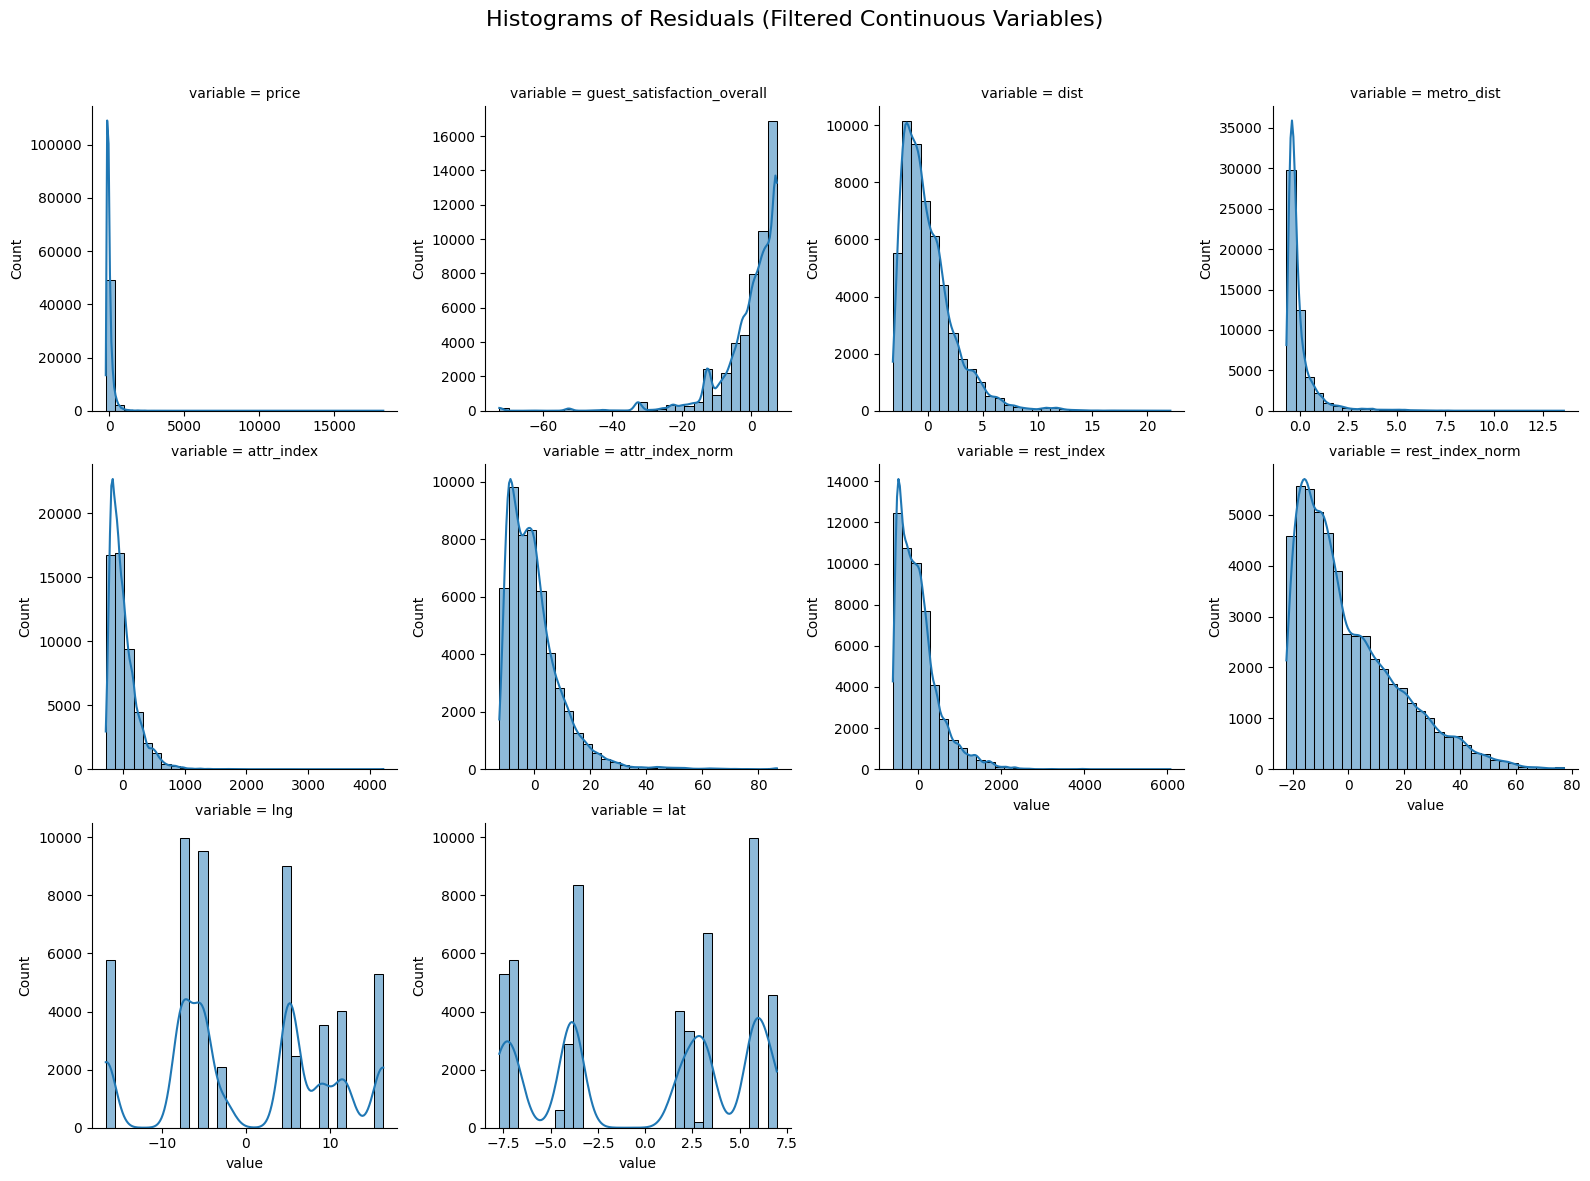

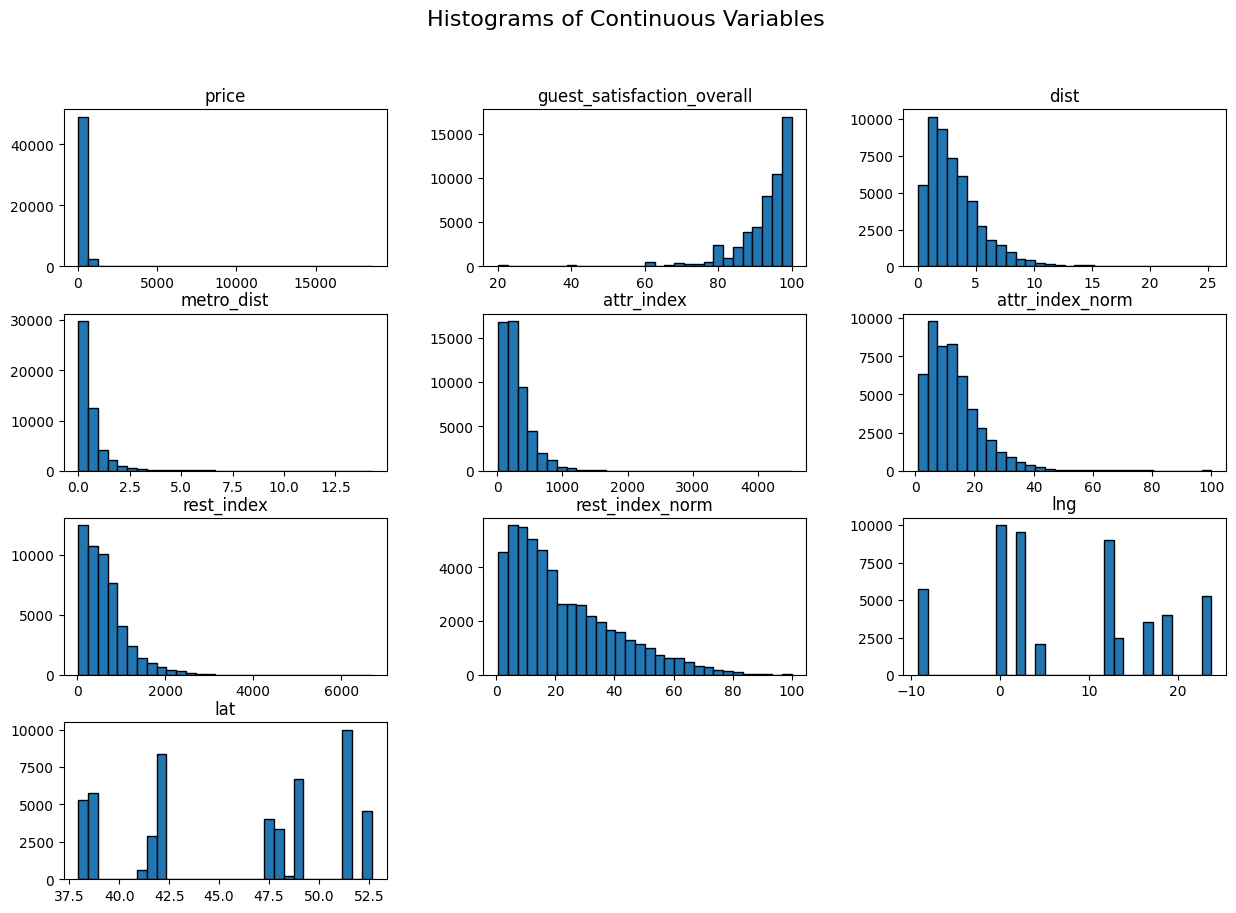

In [14]:

# Create a DataFrame for residuals (numeric columns centered around their mean)
residuals_df = filtered_df[continuous_columns].apply(lambda x: x - x.mean())

# Set up the FacetGrid for residuals
g = sns.FacetGrid(pd.melt(residuals_df), col="variable", col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "value", kde=True, bins=30)

# Add titles and labels
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Histograms of Residuals (Filtered Continuous Variables)", fontsize=16)
plt.show()

# Plot histograms of the raw continuous variables
filtered_df[continuous_columns].hist(figsize=(15, 10), bins=30, grid=False, edgecolor='black')
plt.suptitle("Histograms of Continuous Variables", fontsize=16)
plt.show()


#### Interpretation

- overall the data does not look normally distributed.

#### Step 5: Pairwise Scatter Plots for Numeric Variables

Create a panel plot (pair plot) of scatter plots to visualize relationships between all numeric variables.


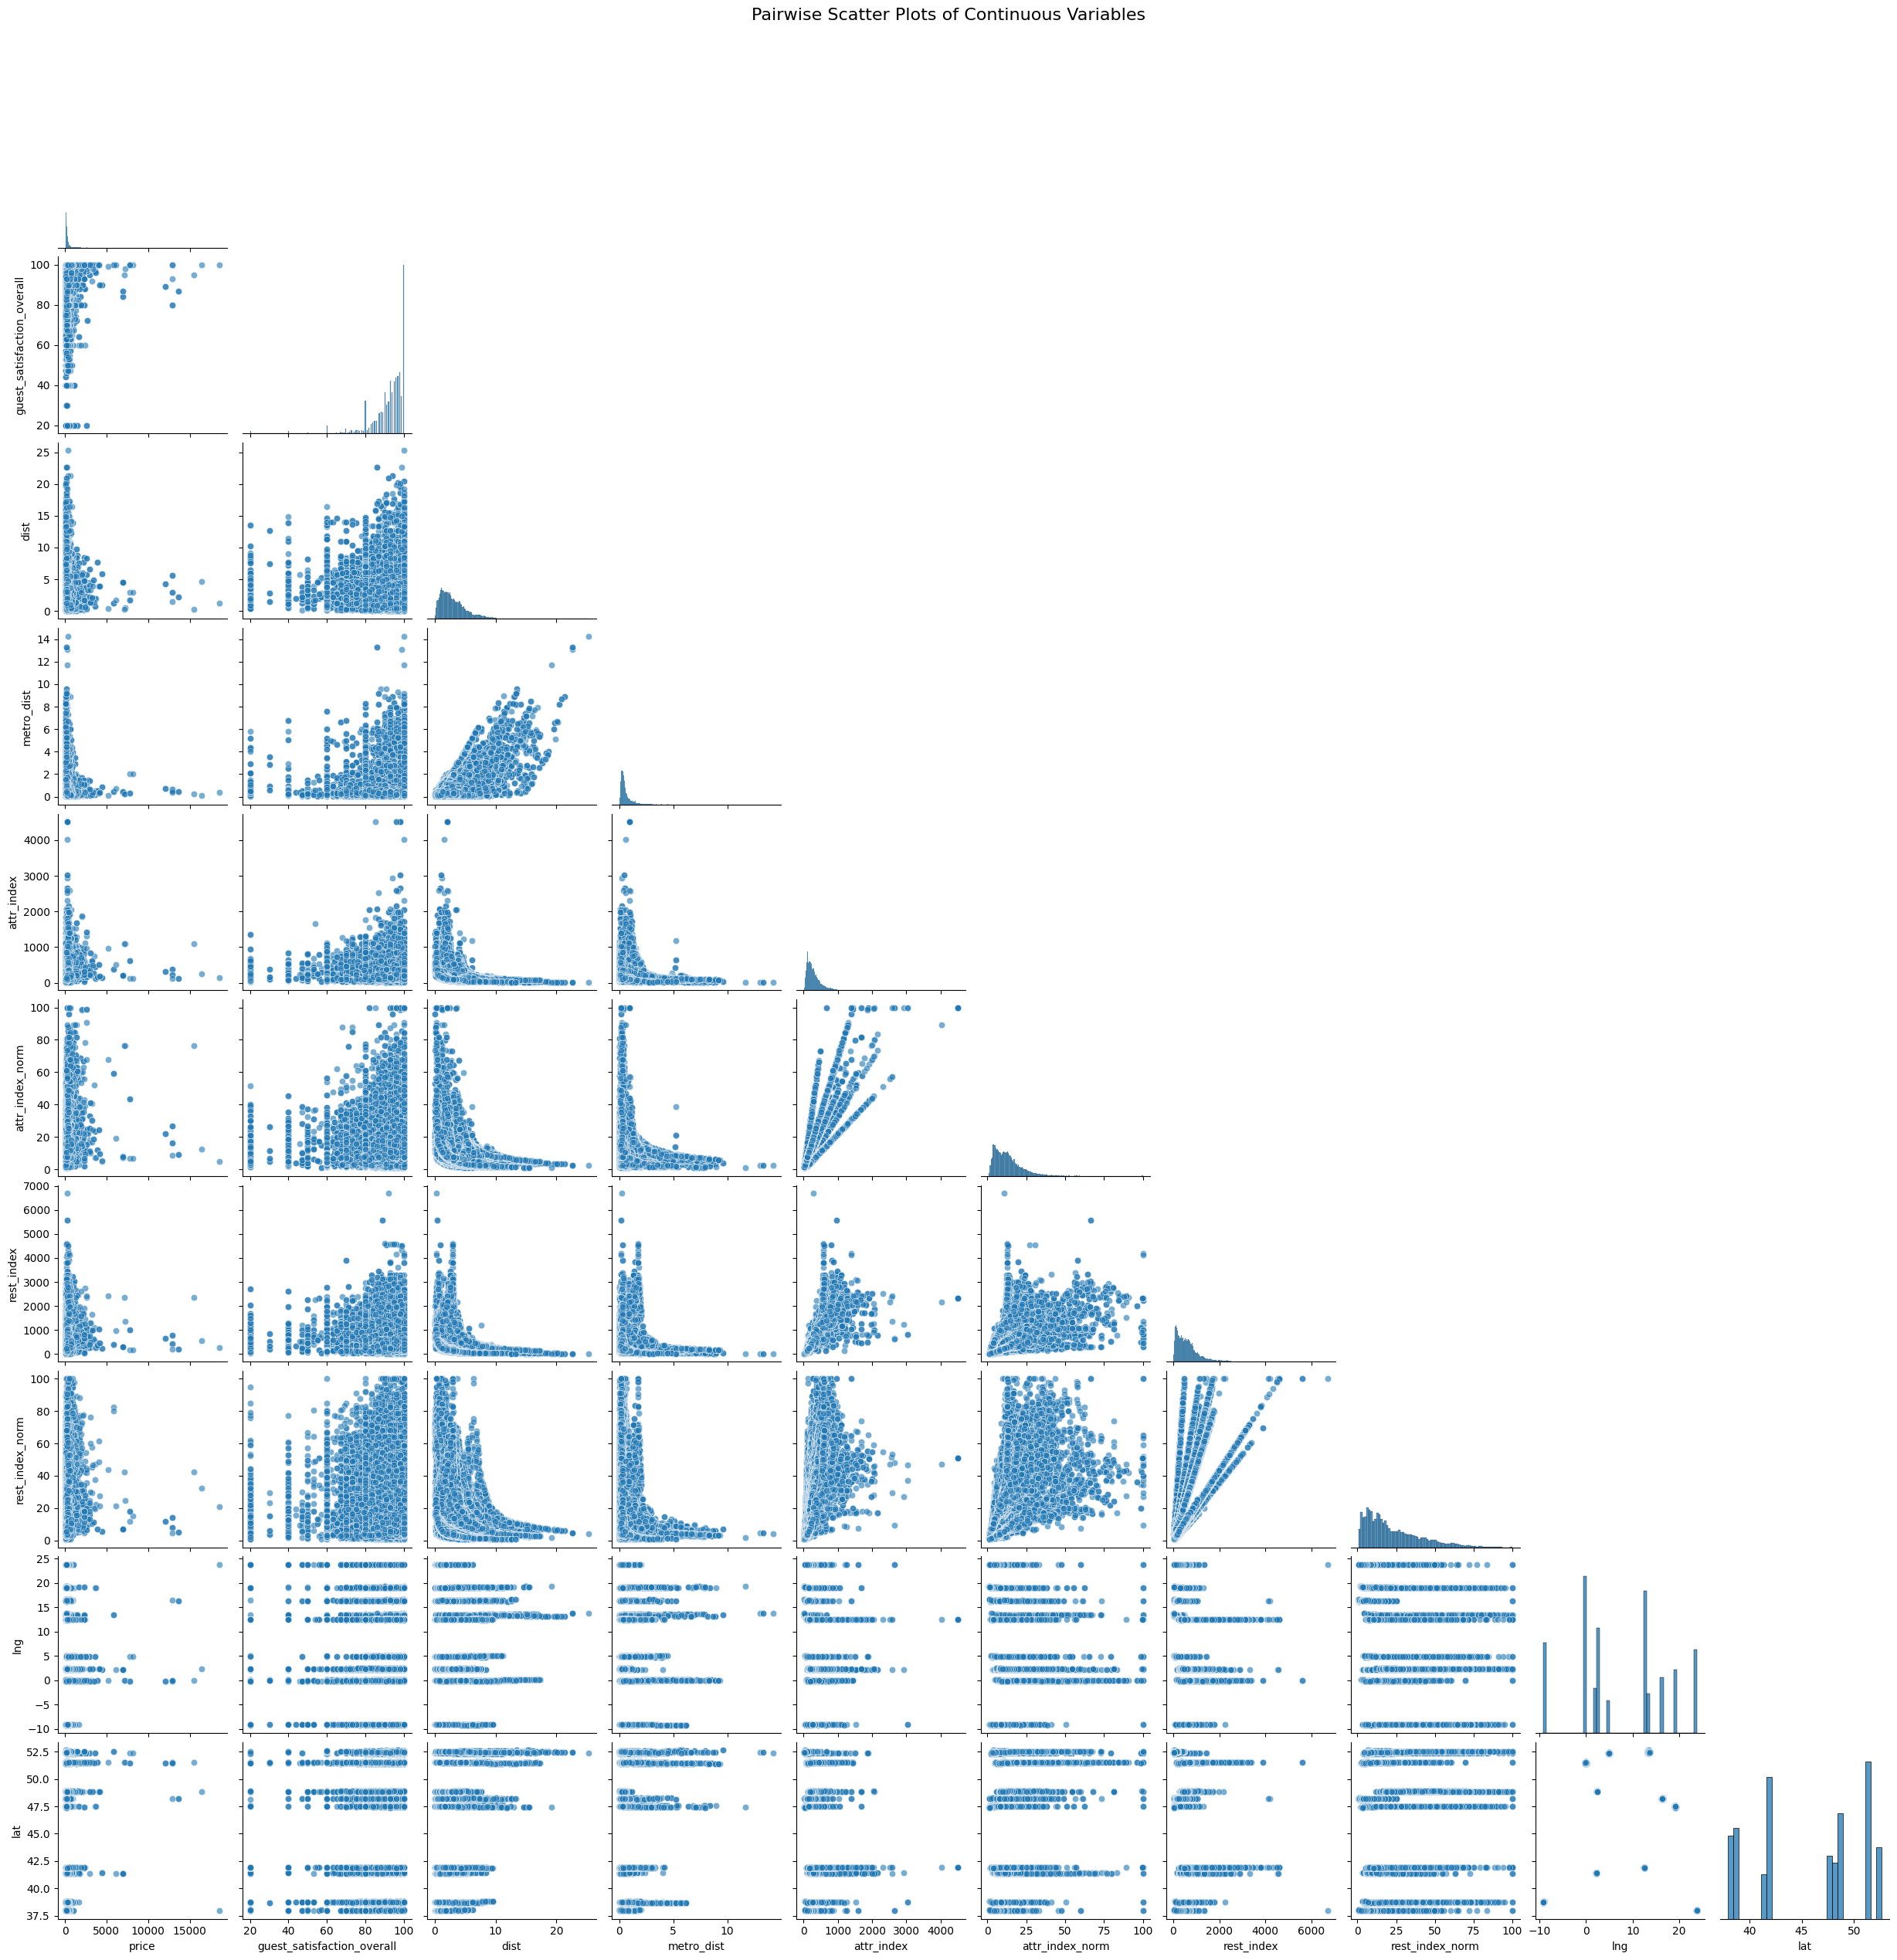

In [15]:
# Create a pair plot for continuous columns
sns.pairplot(
    filtered_df[continuous_columns],  # Data for the pair plot
    kind="scatter",                   # Use scatter plots for pairwise relationships
    diag_kind="hist",                 # Use histograms on the diagonal
    corner=True,                      # Only show the lower triangle to avoid repetition
    plot_kws={'alpha': 0.6},          # Adjust transparency for better visibility
)

# Add a title to the plot
plt.suptitle("Pairwise Scatter Plots of Continuous Variables", fontsize=16, y=1.02)

# Show the plot
plt.show()

##### Step 6: Building a heatmap with Spearman correlation

Since the data does not follow a normal distribution, use a correlation method that works for non-parametric data.

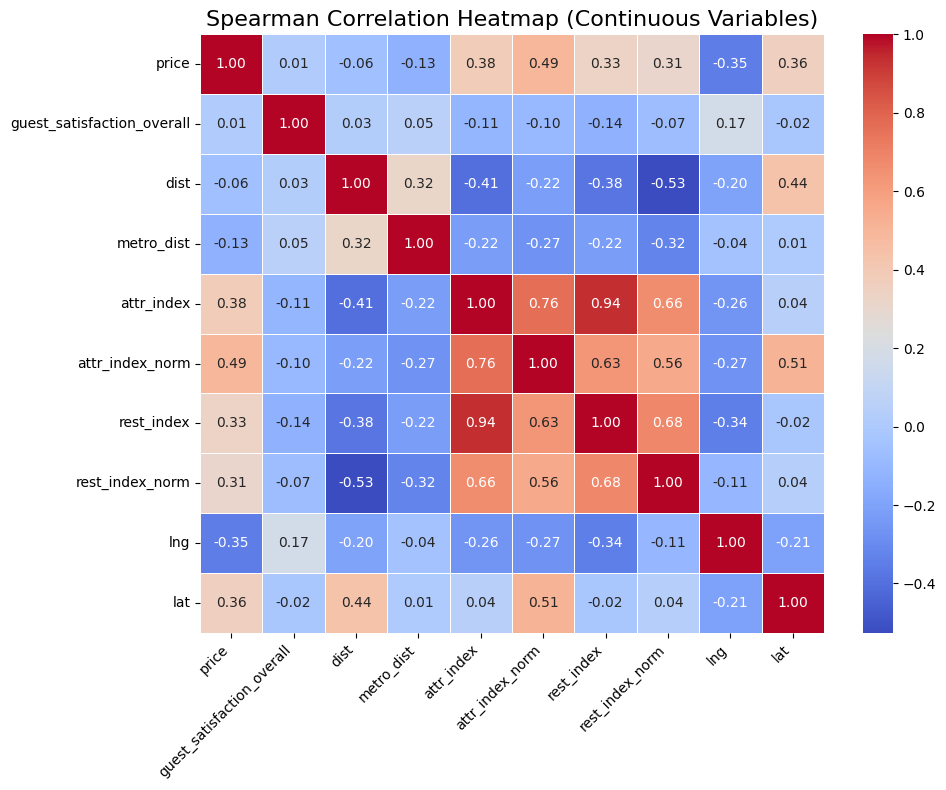

In [16]:

# Calculate Spearman correlation matrix for continuous variables
spearman_corr_matrix = filtered_df[continuous_columns].corr(method='spearman')

# Create a heatmap with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr_matrix,
    annot=True,       # Display correlation values
    fmt=".2f",        # Format values to 2 decimal places
    cmap="coolwarm",  # Use a color gradient for better contrast
    linewidths=0.5,   # Add grid lines for clarity
    cbar=True         # Include a color bar for reference
)

# Add title and axis labels
plt.title("Spearman Correlation Heatmap (Continuous Variables)", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()

# Show the heatmap
plt.show()


#### Step 8: Reducing heatmap to only significat correlations

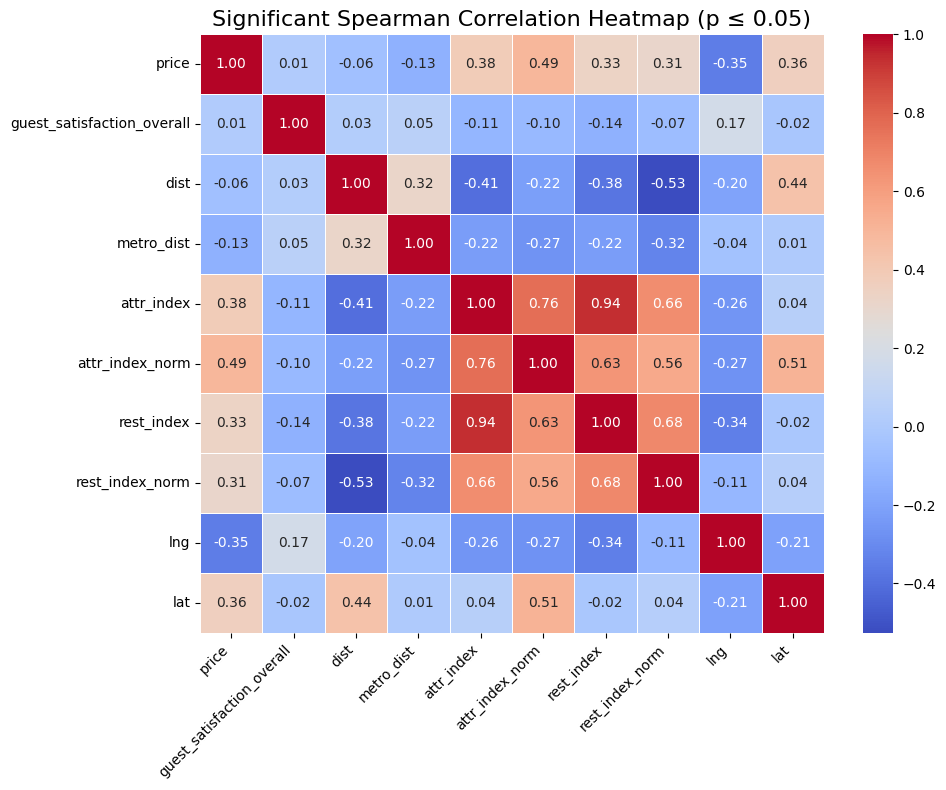

In [18]:
import numpy as np
from scipy.stats import spearmanr

# Calculate Spearman correlation matrix and p-values
correlations = []
p_values = []

for col1 in continuous_columns:
    row_corr = []
    row_p = []
    for col2 in continuous_columns:
        corr, p = spearmanr(filtered_df[col1], filtered_df[col2], nan_policy='omit')
        row_corr.append(corr)
        row_p.append(p)
    correlations.append(row_corr)
    p_values.append(row_p)

# Convert lists to NumPy arrays for easier handling
correlation_matrix = np.array(correlations)
p_value_matrix = np.array(p_values)

# Mask non-significant correlations (e.g., p-value > 0.05)
significance_mask = p_value_matrix <= 0.05  # True for significant correlations
significant_corr_matrix = np.where(significance_mask, correlation_matrix, np.nan)

# Create a heatmap for significant correlations
plt.figure(figsize=(10, 8))
sns.heatmap(
    significant_corr_matrix,
    annot=True,        # Display correlation values
    fmt=".2f",         # Format values to 2 decimal places
    cmap="coolwarm",   # Use a color gradient for better contrast
    linewidths=0.5,    # Add grid lines for clarity
    cbar=True,         # Include a color bar for reference
    mask=np.isnan(significant_corr_matrix)  # Mask non-significant values
)

# Add title and axis labels
plt.title("Significant Spearman Correlation Heatmap (p ≤ 0.05)", fontsize=16)
plt.xticks(ticks=np.arange(len(continuous_columns)) + 0.5, labels=continuous_columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(continuous_columns)) + 0.5, labels=continuous_columns, rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()
